# <center>Iteracyjne równania liniowe i macierze rzadkie</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import timeit
from pympler import asizeof 
from scipy.sparse import diags

**Cel zajęć:** Celem zajęć jest zapoznanie się z macierzami rzadkimi, oraz iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Czyli dana jest macierz [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) $\mathbf{A}$ o wymiarach ($m\times m$) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***

W macierzy rzadkiej większość elementów wynosi 0, w związku z tym przechowywanie wprost takiej macierzy w pamięci jest niepraktyczne. Do przechowywania i wykonywania operacji na macierzach rzadkich służy moduł [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html). 
1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich.
Na protrzeby ninejszego laboratorium wykorzystany zostanie format [Compressed Sparse Column](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html#scipy.sparse.csc_array)  
2. Przedstaw na jednym wykresie (scatter plot) dla 10 równo rozmieszczonych wartości $m$ z zakresu od $100$ do $10000$ ile pamięci zajmuje ta sama macierz o wymiarach ($m\times m$) w zapisana w formacie $numpy.ndarray$ oraz w formacie $scipy.sparse.csc\_array$ 

Do obliczenia rozmiaru zmiennych monżna wykorzystać funkcję [asizeof.asizeof()](https://pympler.readthedocs.io/en/latest/library/asizeof.html#)

3. Z czego wynika taki wygląd wykresu?


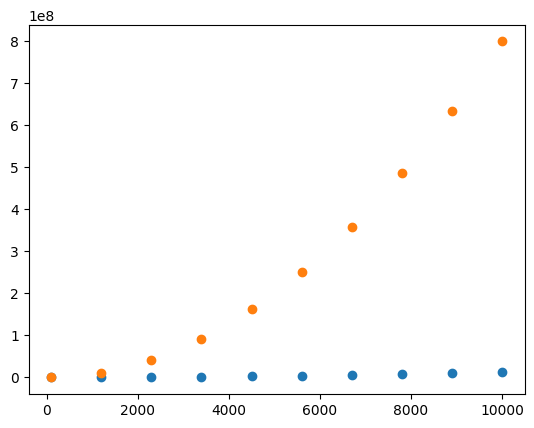

In [2]:
# # Generowanie macierzy w formacie scipy.sparse.csc_array
# m = 100
# A = sp.sparse.random(m, m, density=0.01, format='csc')

# # Uzyskanie reprezentacji tej samej macierzy w formacie numpy.ndarray
# np_A = A.toarray()

vector_m = np.linspace(100, 10000, 10, dtype=int)
size_of_ndarray = []
size_of_scs_array = []

for m in vector_m:
    A = sp.sparse.random(m, m, density=0.01, format='csc')
    np_A = A.toarray()
    size_of_ndarray.append(asizeof.asizeof(A))
    size_of_scs_array.append(asizeof.asizeof(np_A))

plt.scatter(vector_m, size_of_ndarray)
plt.scatter(vector_m, size_of_scs_array)
plt.show()


3) Taki wygląd wykresu wynika z faktu, że macierz utworzona za pomocą ndarray nie jest redukowna więc zajmuje więcej miejsca w pamięci. Macierz csc_array jest to natomiast macierz zredukowana o nipotrzebne zera w występujące w macierzy rzadkiej dzięki czemu jak możemy zobaczyć na wykresie zajmuje mniej pamięci niż metoda ndarray

***Zadanie 2***

Moduł [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) implementuje operacje na macierzach rzadkich w dowolnym formacie.  
1. Wygeneruj dwie macierze $\mathbf{A}$  i $\mathbf{B}$ o wymiarach $1000\times 1000$  
2. Porównaj przy pomocy funkcji $\%timeit$ czas potrzebny na wykonanie mnożenia macierzowe $\mathbf{A * B}$  zapisanych w formacie $numpy.ndarray$ oraz $scipy.sparse.csc\_array$ 
3. Z czego wynika różnica?

In [4]:
A = sp.sparse.random(1000, 1000, density=0.01, format='csc')
B = sp.sparse.random(1000, 1000, density=0.01, format='csc')

np_A = A.toarray()
np_B = B.toarray()


UsageError: Line magic function `%%timeit` not found.


In [17]:
%%timeit -n 100 -r 1
np_AB = np_A@np_B

# Czas potrzebny na wykonanie mnożenia dla macierzy A i B w formacie numpy.ndarray'

28.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [18]:
%%timeit -n 100 -r 1
csc_AB = A@B

# Czas potrzebny na wykonanie mnożenia dla macierzy A i B w formacie scipy.sparse.csc_array

2.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


3) Różnica wynika w ilości potrzebnych do wykonania działań. Dla macierzy csc mamy do wykoanania mniej mnożen ze względu na zredukowaną postać. Natomiast w przypaku macierzy np_AB tych działań musimy wykonać znacznie więcej

***Zadanie 3***  

Aby metody iteracyjne znalazły rozwiązanie układu należy zadbać o to by macierz $\mathbf{A}$ w układzie $\mathbf{Ax}=\mathbf{b}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcanie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, w związku z czym na potrzeby tego zadania należy sprawdzić czy wygenerowaliśmy macierz o odpowiedniej własności, aby pominąć krok przekształcania.

1. Uzupełnij funkcję $is\_diagonaly\_dominant()$ w pliku $main.py$ zgodnie z opisem  
(podpowiedź: korzystanie z pętli for nie jest dobrym rozwiązaniem, ponieważ często mamy do czynienia z bardzo dużymi wymiarami, przy których pętle zajmują bardzo duożo czasu. Skoprzystaj z funkcji [np.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), oraz [np.diagonal()](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html))  

2. Wygeneruj przy pomocy funkcji $generate\_matrix()$ macierz $\mathbf{A}$ o wymiarach $1000\times 1000$. Przy pomocy funkcji z poprzedniego punktu zweryfikuj, czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor $\mathbf{b}$ $1000\times 1$


    
Istnieje wiele metod iteracyjnego rozwiązywania równań, nie różnią się one znacząco od siebie w kwesti wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. W przypadku wyboru drugiej opcji należy zadbać o to aby macierz była dodatnio określona, poprzez podanie argumentu $is\_simetrical = True$

3. Korzystając z funkcji $residual\_norm()$ z pliku $main.py$ zbadaj wpływ argumentów $tol$ i $maxiter$ na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów  
4. Opisz zaobserwowane zależności 


Czy macierz A jest diagonalnie zdominowana? True


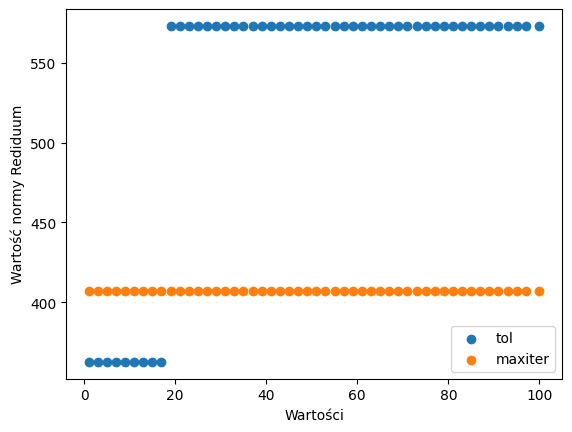

In [24]:
def generate_matrix(m=1000, is_simetrical=False):
    if is_simetrical:
        num_u = np.random.randint(2, m//2)
        num_l = np.random.randint(2, m//2)
        diagonal_values = np.random.rand(num_u)
        matrix = diags(diagonal_values, list(range(0, num_u)), shape=(m, m))
        matrix = matrix + matrix.T
        a = matrix.toarray()
        np.fill_diagonal(a, np.sum(np.abs(a), axis=1) - np.abs(np.diagonal(a)) + np.random.rand(m))
        return sp.sparse.csc_array(a)
    else:
        num_u = np.random.randint(2, m//2)
        num_l = np.random.randint(2, m//2)
        diagonal_values = np.random.rand(num_u + num_l)
        matrix = diags(diagonal_values, list(range(-num_l, num_u)), shape=(m, m))
        a = matrix.toarray()
        np.fill_diagonal(a, np.sum(np.abs(a), axis=1) - np.abs(np.diagonal(a)) + np.random.rand(m))
        return sp.sparse.csc_array(a)
    
# Zadanie 2
A = generate_matrix()
A = A.toarray()
check_A = main.is_diagonaly_dominant(A)
print("Czy macierz A jest diagonalnie zdominowana?", check_A)


b = np.random.rand(1000, 1)
b = b.reshape(-1, 1)

# Zadanie 3 dla metody GMRES
tol = []
maxiter = []

vec = np.linspace(1, 100, 50, dtype=int)

for k in vec:
    x1, info1 = sp.sparse.linalg.gmres(A, b, tol=k)
    residual_norm_tol = main.residual_norm(A, x1, b)
    tol.append(residual_norm_tol)

    x2, info2 = sp.sparse.linalg.gmres(A, b, maxiter=k)
    residual_norm_maxiter = main.residual_norm(A, x2, b)
    maxiter.append(residual_norm_maxiter)


plt.scatter(vec, tol, label='tol')
plt.scatter(vec, maxiter, label='maxiter')
plt.xlabel("Wartości")
plt.ylabel("Wartość normy Rediduum")
plt.legend()
plt.show()

4) Na podstawie powyższego wykresu można zaobserwoać, że dla różnych wartości argumentów tol i maxiter wartośći residuum dla funkcji GMRES jest różna. W przypadku argumentu maxiter wartości normy się nie zmienia natomiast dla argumentu tol różnica normy residuum jest bardzo duża.